## import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob
import os

import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,precision_score, recall_score, f1_score

pd.set_option("display.max_rows", None, "display.max_columns", None)

## Read Data

In [3]:
df = pd.read_csv("data/balance_df.csv")

print("\n\nSample Data:")
print("============\n")
print(df.head(20))



Sample Data:

        C1  C2    C3       C4        C5        C6       C7        C8  \
0   245.60   1   NaN  31.2500  8.454240 -1.871440  4.59909  8.451590   
1   141.46   1   NaN  31.1875  0.618133  5.846740  7.95803  0.448719   
2   130.66   1   NaN  32.6250  4.859850  0.239379  8.34838  5.033420   
3   217.70   1   NaN  30.8750  0.483315  4.564340  8.69159  0.458395   
4   194.22   1   NaN  33.3750  5.079910 -0.142770  8.23750  5.193740   
5   356.67   1   NaN  31.4375  7.083600  1.801560  6.79844  7.035430   
6    97.33   1   NaN  30.2500  0.335643  4.111920  8.88335  0.291327   
7   148.52   1   NaN  33.6875  6.801130  2.859530  6.05938  7.071460   
8   134.71   1   NaN  33.3125  4.966010 -0.407134  8.27518  5.087230   
9   101.13   1   NaN  33.5625  7.179290  3.273280  5.98667  7.331990   
10  134.08   1  72.0  33.9375  6.531090 -1.911720  6.87966  6.510870   
11  156.96   1   NaN  30.5625  0.406670  4.413170  8.69096  0.398364   
12  205.88   1   NaN  33.3750  4.996580 -0.29562

## Utils Function

In [4]:
def count_digit(num):
    count = 0
    while num != 0:
        num //= 10
        count += 1
    return count

def check_shape(df):
    rows, cols = df.shape
    print("\nNumber or rows in dataset: {}".format(rows))
    print("==========================={}".format(count_digit(rows)*'='))
    print("\nNumber or columns in dataset: {}".format(cols))
    print("=============================={}".format(count_digit(cols)*'='))
    
def modelEvaluation(predictions, y_test_set, model_name, classes):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions, target_names = classes))
#     print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set,predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True,yticklabels=classes, xticklabels=classes, fmt='g',cmap='jet')
    
    plt.title('Confusion Matrix of {}'.format(model_name))
    plt.xlabel('predicted Labels')
    plt.ylabel('Actual Labels')
#     plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions,average='macro'),
              recall_score(y_test_set, predictions,average='macro'),f1_score(y_test_set, predictions,average='macro')]#store results of model
    return results

# Understand Sample Data
## Dataset Samples and Features Count

In [5]:
# Understand Sample Data

print("\n\nAttributes in Sample Data:")
print("==========================\n")

print(df.columns)

print("\n\nNumber of Instances in Sample Data:",len(df.index))
print("===================================={}\n".format(count_digit(len(df.index))*'='))



Attributes in Sample Data:

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31',
       'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41',
       'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C50', 'C51',
       'C52', 'C53', 'C54'],
      dtype='object')


Number of Instances in Sample Data: 270000



## Rename Columns

In [6]:
rename_column = True
# column_dict = {"Existing Name": "New Column"}
column_dict = {"C1": "time", "C2": "label"}

if rename_column:
    df = df.rename(columns=column_dict)
    
    print("\n\nAttributes in Sample Data:")
    print("==========================\n")
    print(df.columns)
    
    print("\n\nSample Data:")
    print("============\n")
    print(df.head(2))



Attributes in Sample Data:

Index(['time', 'label', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31',
       'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41',
       'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C50', 'C51',
       'C52', 'C53', 'C54'],
      dtype='object')


Sample Data:

     time  label  C3       C4        C5       C6       C7        C8       C9  \
0  245.60      1 NaN  31.2500  8.454240 -1.87144  4.59909  8.451590 -1.82178   
1  141.46      1 NaN  31.1875  0.618133  5.84674  7.95803  0.448719  5.79011   

       C10       C11       C12       C13       C14      C15      C16  \
0  4.83646 -0.003862  0.035060 -0.012050  -1.03899  16.9162 -40.3566   
1  8.01423  0.030756 -0.002772 -0.011148 -32.48750  16.6565 -39.0734   

        C17       C18       C19       C20      C21       

## Initial Class Distribution

<AxesSubplot:xlabel='label'>

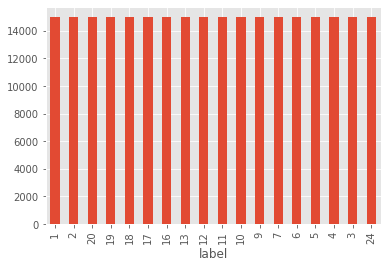

In [7]:
# print(df.label.value_counts(), "\n")

df['label'].value_counts()
plt.style.use('ggplot')
df.value_counts('label').plot(kind='bar')

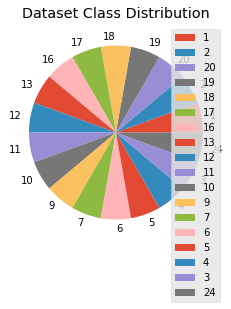

In [8]:
classes_counts = df.value_counts('label')
values = np.array(classes_counts)
mylabels = list(classes_counts.index)

plt.pie(values, labels = mylabels)
plt.legend()
plt.title('Dataset Class Distribution')
# plt.ylabel('Counts')
plt.show() 

# Preprocessing Data

In [9]:
df = df.reset_index()

## Drop Unwanted Classes

Text(0, 0.5, 'Counts')

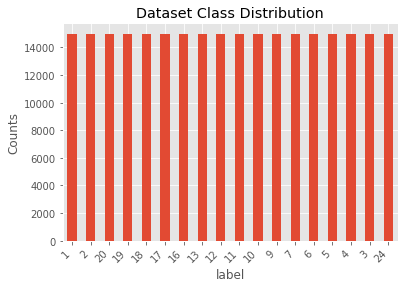

In [10]:
df.drop(df[df['label'] == 0].index, inplace = True)
# print(df['label'].value_counts(), "\n")

df['label'].value_counts()
plt.style.use('ggplot')
df.value_counts('label').plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Dataset Class Distribution')
plt.ylabel('Counts')

# Feature Extraction

In [11]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)
df.shape

(24352, 55)

In [34]:
print(df['label'].value_counts(), "\n")

17.0    1382
16.0    1380
11.0    1373
2.0     1372
10.0    1369
12.0    1369
9.0     1369
20.0    1362
1.0     1360
6.0     1357
18.0    1353
19.0    1353
3.0     1350
4.0     1349
7.0     1344
13.0    1313
5.0     1306
24.0    1291
Name: label, dtype: int64 



Text(0, 0.5, 'Counts')

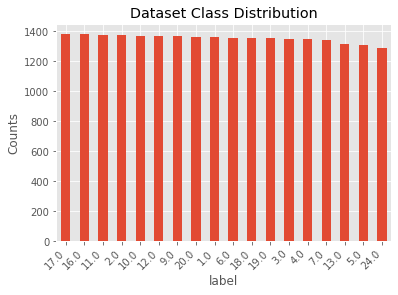

In [12]:
df['label'].value_counts()
plt.style.use('ggplot')
df.value_counts('label').plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Dataset Class Distribution')
plt.ylabel('Counts')

In [13]:
features = list(df.columns[3:])
X = df[features]
y = df['label']

# Train Test Split

In [14]:
def split_df(X, y, split_index):
    if split_index==0:
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
        return X_train,X_test,y_train,y_test
    if split_index==1:
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
        X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.1)
        return X_train, X_test, X_val, y_train, y_test, y_val

In [15]:
split_index = 1
split = ['train_test', 'train_test_val']

# y = df['encoded_label']
X_train,X_test,X_val,y_train,y_test,y_val = split_df(X, y, split_index)

9.0     1003
17.0    1001
16.0     998
2.0      994
12.0     991
11.0     987
10.0     987
1.0      980
7.0      977
3.0      975
4.0      973
19.0     971
18.0     970
6.0      959
20.0     959
13.0     952
24.0     933
5.0      922
Name: label, dtype: int64 



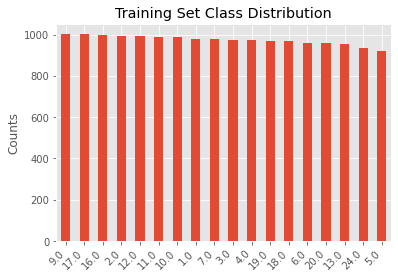

20.0    289
10.0    285
6.0     284
7.0     279
3.0     277
18.0    277
17.0    277
16.0    275
19.0    273
11.0    269
2.0     269
5.0     268
12.0    266
1.0     264
13.0    259
4.0     256
24.0    254
9.0     250
Name: label, dtype: int64 



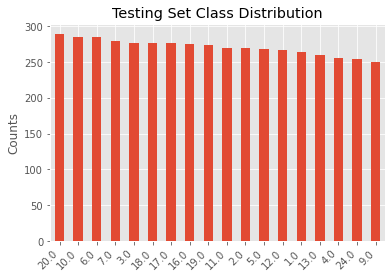

4.0     120
11.0    117
5.0     116
9.0     116
1.0     116
20.0    114
6.0     114
12.0    112
19.0    109
2.0     109
16.0    107
18.0    106
24.0    104
17.0    104
13.0    102
3.0      98
10.0     97
7.0      88
Name: label, dtype: int64 



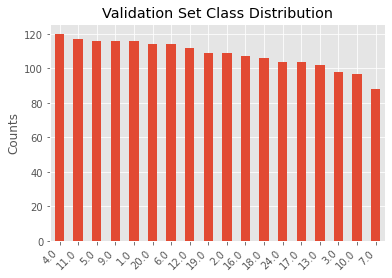

In [16]:
X_train1,X_test1,X_val1,y_train1,y_test1,y_val1 = split_df(X, y, split_index)

print(y_train1.value_counts(), "\n")
plt.style.use('ggplot')
y_train1.value_counts().plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Training Set Class Distribution')
plt.ylabel('Counts')
plt.show()

print(y_test1.value_counts(), "\n")
plt.style.use('ggplot')
y_test1.value_counts().plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Testing Set Class Distribution')
plt.ylabel('Counts')
plt.show()

print(y_val1.value_counts(), "\n")
plt.style.use('ggplot')
y_val1.value_counts().plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Validation Set Class Distribution')
plt.ylabel('Counts')

del X_train1,X_test1,X_val1,y_train1,y_test1,y_val1

# Machine Learning

In [17]:
classes = list(df['label'].map(int).map(str).unique())
collect_results_of_all_model= {
    'Metrics':['accuracy','precision','recall','f1-score']
} #dic form store results of all models

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

preds = lr_classifier.predict(X_test)

========== LR ==========

Accuracy on validation set: 0.6910

Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.96      0.95       292
           2       0.79      0.81      0.80       268
           3       0.59      0.74      0.66       268
           4       0.52      0.63      0.57       260
           5       0.57      0.59      0.58       237
           6       0.83      0.90      0.86       296
           7       0.56      0.49      0.52       265
           9       0.95      0.96      0.96       304
          10       0.82      0.93      0.87       269
          11       0.96      1.00      0.98       269
          12       0.48      0.47      0.48       278
          13       0.41      0.29      0.34       277
          16       0.65      0.66      0.65       277
          17       0.68      0.68      0.68       265
          18       0.59      0.53      0.56       267
          19       0.47      0.35      0.40    

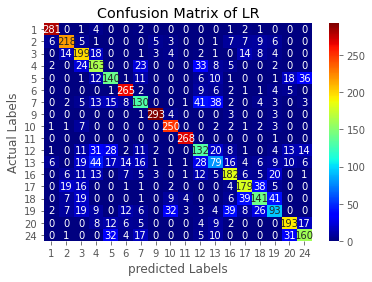

In [19]:
LR_res=modelEvaluation(preds, y_test, 'LR', classes)
collect_results_of_all_model["LR"] = LR_res

## Decision Tree Model

In [20]:
from sklearn.tree import DecisionTreeClassifier

DT_classifier = DecisionTreeClassifier(random_state=0)
DT_classifier.fit(X_train,y_train)

preds = DT_classifier.predict(X_test)

## Desicion Tree Result

========== DT ==========

Accuracy on validation set: 0.9390

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99       292
           2       0.97      0.96      0.96       268
           3       0.90      0.96      0.93       268
           4       0.89      0.90      0.90       260
           5       0.97      0.96      0.96       237
           6       0.96      0.92      0.94       296
           7       0.91      0.95      0.93       265
           9       1.00      0.99      1.00       304
          10       0.99      0.99      0.99       269
          11       0.99      1.00      1.00       269
          12       0.81      0.81      0.81       278
          13       0.84      0.81      0.83       277
          16       0.88      0.86      0.87       277
          17       0.92      0.94      0.93       265
          18       0.97      0.95      0.96       267
          19       0.94      0.94      0.94    

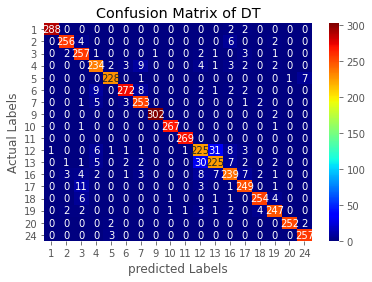

In [21]:
DT_res=modelEvaluation(preds, y_test, 'DT', classes)
collect_results_of_all_model["DT"] = DT_res

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=5, bootstrap=100)
RF.fit(X_train,y_train)

preds_RF = RF.predict(X_test)

## Random Forest Results

========== Random Forest ==========

Accuracy on validation set: 0.7456

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.94      0.97       292
           2       0.76      0.94      0.84       268
           3       0.53      0.79      0.64       268
           4       0.64      0.48      0.55       260
           5       0.92      0.53      0.67       237
           6       0.85      0.93      0.89       296
           7       0.78      0.70      0.74       265
           9       1.00      0.95      0.98       304
          10       0.88      0.98      0.93       269
          11       0.99      0.98      0.98       269
          12       0.54      0.78      0.64       278
          13       0.63      0.33      0.43       277
          16       0.71      0.58      0.64       277
          17       0.52      0.92      0.66       265
          18       0.67      0.41      0.51       267
          19       0.79      0.31   

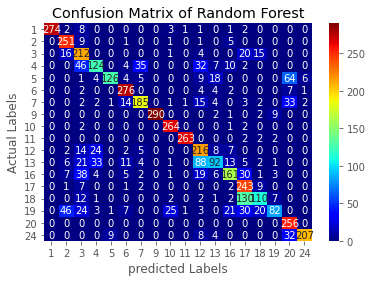

In [23]:
RF_res = modelEvaluation(preds_RF, y_test, 'Random Forest', classes)
collect_results_of_all_model["RF_CLassifier"] = RF_res

## Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

NB_classifier = GaussianNB()
NB_classifier.fit(X_train,y_train)

preds = NB_classifier.predict(X_test)

## Naive Bayes Reuslts

========== NB ==========

Accuracy on validation set: 0.7612

Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.91      0.94       292
           2       0.90      0.78      0.83       268
           3       0.58      0.83      0.69       268
           4       0.77      0.72      0.75       260
           5       0.71      0.68      0.69       237
           6       0.95      0.94      0.94       296
           7       0.76      0.72      0.74       265
           9       1.00      0.94      0.97       304
          10       0.95      0.96      0.95       269
          11       0.98      0.99      0.99       269
          12       0.60      0.58      0.59       278
          13       0.61      0.53      0.57       277
          16       0.67      0.76      0.71       277
          17       0.53      0.86      0.66       265
          18       0.57      0.37      0.45       267
          19       0.51      0.44      0.47    

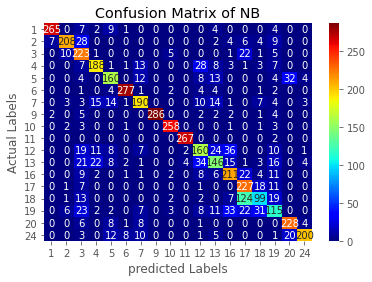

In [25]:
NB_res=modelEvaluation(preds, y_test, 'NB', classes)
collect_results_of_all_model["NB"] = NB_res

## AdaBoost 

In [26]:
from sklearn.ensemble import AdaBoostClassifier

AB_classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
AB_classifier.fit(X_train,y_train)

preds = AB_classifier.predict(X_test)

## AdaBoost Result

========== AdaBoot ==========

Accuracy on validation set: 0.2537

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.89      0.94       292
           2       0.00      0.00      0.00       268
           3       0.00      0.00      0.00       268
           4       0.00      0.00      0.00       260
           5       0.13      0.71      0.22       237
           6       0.18      0.31      0.23       296
           7       0.12      0.02      0.03       265
           9       0.96      0.93      0.94       304
          10       0.00      0.00      0.00       269
          11       0.00      0.00      0.00       269
          12       0.00      0.00      0.00       278
          13       0.00      0.00      0.00       277
          16       0.00      0.00      0.00       277
          17       0.12      0.98      0.21       265
          18       0.00      0.00      0.00       267
          19       0.00      0.00      0.0

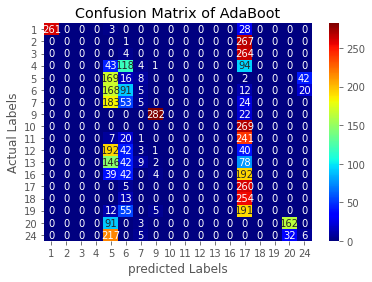

In [27]:
Ada_res=modelEvaluation(preds, y_test, 'AdaBoot', classes)
collect_results_of_all_model["Ada"] = Ada_res

## SVM Model

In [28]:
from sklearn.svm import SVC

SVC_classifier = SVC(max_iter=200)
SVC_classifier.fit(X_train,y_train)

preds = SVC_classifier.predict(X_test)

## SVM Results

========== SVM ==========

Accuracy on validation set: 0.6321

Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.97      0.98       292
           2       0.91      0.90      0.91       268
           3       0.71      0.87      0.78       268
           4       0.61      0.32      0.42       260
           5       0.75      0.18      0.29       237
           6       0.87      0.93      0.90       296
           7       0.74      0.41      0.53       265
           9       1.00      0.96      0.98       304
          10       0.98      0.98      0.98       269
          11       0.99      0.98      0.99       269
          12       0.55      0.41      0.47       278
          13       0.41      0.43      0.42       277
          16       0.38      0.54      0.45       277
          17       0.59      0.09      0.15       265
          18       0.50      0.22      0.30       267
          19       0.29      0.81      0.42   

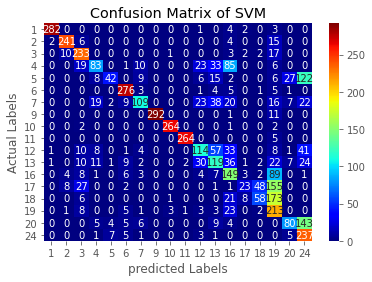

In [29]:
SVC_res=modelEvaluation(preds, y_test, 'SVM', classes)
collect_results_of_all_model["SVC"] = SVC_res

## KNN Model

In [30]:
from sklearn.neighbors import KNeighborsClassifier

neighbors_clf = KNeighborsClassifier(n_neighbors=5,)
neighbors_clf.fit(X_train,y_train)

KNN_preds = neighbors_clf.predict(X_test)

## KNN Results

========== KNN ==========

Accuracy on validation set: 0.8799

Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.99      0.98       292
           2       0.97      0.96      0.96       268
           3       0.88      0.98      0.93       268
           4       0.67      0.87      0.76       260
           5       0.85      0.88      0.86       237
           6       0.91      0.98      0.94       296
           7       0.78      0.88      0.83       265
           9       1.00      0.99      0.99       304
          10       0.98      0.99      0.99       269
          11       0.99      1.00      0.99       269
          12       0.76      0.70      0.73       278
          13       0.86      0.54      0.66       277
          16       0.84      0.74      0.79       277
          17       0.85      0.88      0.87       265
          18       0.83      0.94      0.88       267
          19       0.88      0.76      0.82   

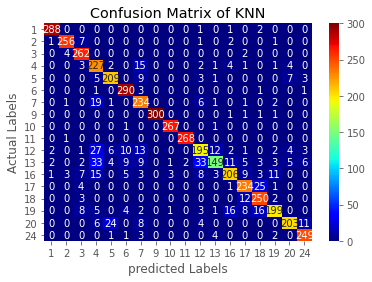

In [31]:
KNN_res = modelEvaluation(KNN_preds,y_test,'KNN',classes)
collect_results_of_all_model["KNN"] = KNN_res

# Rsults Comparison
## Comparison Table

In [32]:
from tabulate import tabulate 
metrics_data_frame = pd.DataFrame(collect_results_of_all_model) # create dataframe
metrics_data_frame = metrics_data_frame.set_index('Metrics') # set index
# displaying the DataFrame
print(tabulate(metrics_data_frame, headers = 'keys', tablefmt = 'psql')) # convert results in to table

+-----------+----------+----------+-----------------+----------+----------+----------+----------+
| Metrics   |       LR |       DT |   RF_CLassifier |       NB |      Ada |      SVC |      KNN |
|-----------+----------+----------+-----------------+----------+----------+----------+----------|
| accuracy  | 0.691029 | 0.939027 |        0.745637 | 0.76124  | 0.253747 | 0.632108 | 0.879901 |
| precision | 0.677872 | 0.939118 |        0.767636 | 0.766679 | 0.190334 | 0.682688 | 0.881516 |
| recall    | 0.686376 | 0.939417 |        0.74141  | 0.758224 | 0.249882 | 0.622972 | 0.879011 |
| f1-score  | 0.679667 | 0.939106 |        0.731464 | 0.756521 | 0.18526  | 0.607114 | 0.876079 |
+-----------+----------+----------+-----------------+----------+----------+----------+----------+


Text(0.5, 0, 'Evaluation Measure')

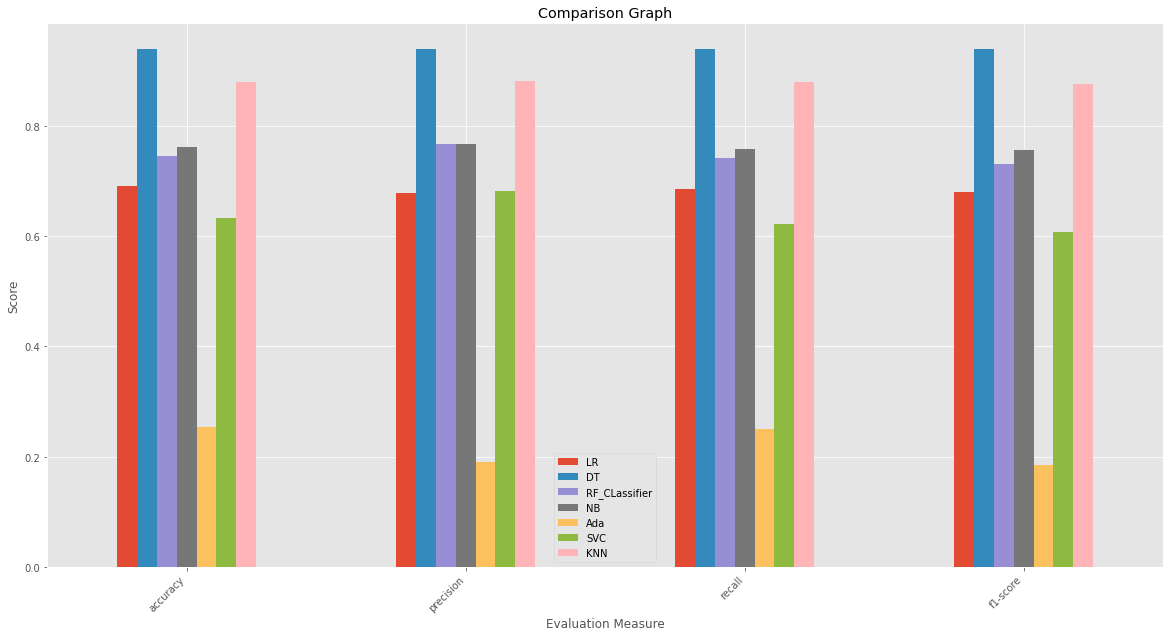

In [33]:
metrics_data_frame.plot(kind='bar', figsize=(20,10)) # sho comparison base of mertics
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Comparison Graph')
plt.ylabel('Score')
plt.xlabel("Evaluation Measure")